# Linear Regression - 1 (without missing values)

In [271]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [272]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1)) #independent variable needs to be 2-D
y = np.array([5, 20, 14, 32, 22, 38])

In [273]:
model=LinearRegression()

In [274]:
model.fit(x,y)

''' With .fit(), you calculate the optimal values of the weights 𝑏₀ and 𝑏₁,
using the existing input and output (x and y) as # the arguments.

i.e. in y = mx + c, m (coef_) and c (intercept_) are calculated.
'''

' With .fit(), you calculate the optimal values of the weights 𝑏₀ and 𝑏₁,\nusing the existing input and output (x and y) as # the arguments.\n\ni.e. in y = mx + c, m (coef_) and c (intercept_) are calculated.\n'

In [275]:
print("Intercept:", model.intercept_)
print("Coef:", model.coef_)

Intercept: 5.633333333333329
Coef: [0.54]


In [276]:
# You can obtain the coefficient of determination (𝑅²) with .score() called on model
r_sq = model.score(x, y)
print("R2:",r_sq)

R2: 0.715875613747954


Now, the model is ready and also you are aware of what the R2 value is. Now you can use this model to predict values based on new x values: x_new

In [306]:
x_new=np.linspace(25,100,18)
print("x_new:\n", x_new)

y_predicted = model.predict(x_new.reshape(-1,1))

print("Y predicted values:", y_predicted)

x_new:
 [ 25.          29.41176471  33.82352941  38.23529412  42.64705882
  47.05882353  51.47058824  55.88235294  60.29411765  64.70588235
  69.11764706  73.52941176  77.94117647  82.35294118  86.76470588
  91.17647059  95.58823529 100.        ]
Y predicted values: [19.13333333 21.51568627 23.89803922 26.28039216 28.6627451  31.04509804
 33.42745098 35.80980392 38.19215686 40.5745098  42.95686275 45.33921569
 47.72156863 50.10392157 52.48627451 54.86862745 57.25098039 59.63333333]


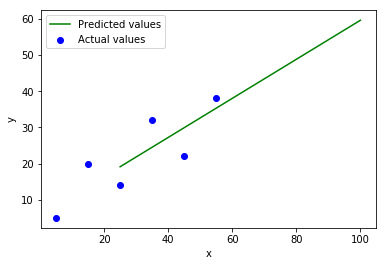

In [309]:
import matplotlib.pyplot as plt

plt.scatter(x.reshape(1,-1),y,color='blue',label='Actual values') #plots original x,y values on a scatter-plot
plt.plot(x_new,y_predicted,color='green',label='Predicted values') #plots x_new, y_predicted on a line-plot

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

# Linear Regression - 2 (with missing values)

In [254]:
a=np.array([ [1,2,3,5,6,np.nan,7,7.5,6,5], [2,3,5,6,7,8,9,10,np.nan,14], 
             [22000,23000,24000,28000,33000,39000,42000,44000,52000,53000] ])
data=pd.DataFrame(a.T,columns=['Age','Certifications','Salary'])

print(data) # Observe data in columns with NaN data as well. We will work on these later.

# Independent variables = Age, Certifications
# Dependent variables = Salary

   Age  Certifications   Salary
0  1.0             2.0  22000.0
1  2.0             3.0  23000.0
2  3.0             5.0  24000.0
3  5.0             6.0  28000.0
4  6.0             7.0  33000.0
5  NaN             8.0  39000.0
6  7.0             9.0  42000.0
7  7.5            10.0  44000.0
8  6.0             NaN  52000.0
9  5.0            14.0  53000.0


In [255]:
# First approach: Dropping the NaN values

data_dropped = data.dropna(axis=0)

print(data_dropped) # You can see rows containing NaN are dropped

   Age  Certifications   Salary
0  1.0             2.0  22000.0
1  2.0             3.0  23000.0
2  3.0             5.0  24000.0
3  5.0             6.0  28000.0
4  6.0             7.0  33000.0
6  7.0             9.0  42000.0
7  7.5            10.0  44000.0
9  5.0            14.0  53000.0


In [256]:
from sklearn.model_selection import train_test_split

In [257]:
# Let's assume just one independent variable 'Certifications'

# Let's now extract Certifications & Salary data

certifications=data_dropped.iloc[:,-2].values

salary=data_dropped.iloc[:,-1].values

print("Certifications data:", certifications)
print("Salary data:", salary)

Certifications data: [ 2.  3.  5.  6.  7.  9. 10. 14.]
Salary data: [22000. 23000. 24000. 28000. 33000. 42000. 44000. 53000.]


In [258]:
certification_train,certification_test,salary_train,salary_test=train_test_split(np.array(certifications),np.array(salary),test_size=0.2,random_state=0)

In [259]:
print(certification_train)
print(certification_test)
print(salary_train)
print(salary_test)

[ 3. 14.  6.  2.  9.  7.]
[10.  5.]
[23000. 53000. 28000. 22000. 42000. 33000.]
[44000. 24000.]


In [260]:
model=LinearRegression()

model.fit(certification_train.reshape(-1,1), salary_train.reshape(-1,1))

print(model.intercept_)
print(model.coef_)

[14873.46221441]
[[2725.83479789]]


In [261]:
from sklearn.metrics import r2_score
from sklearn import metrics

In [262]:
salary_prediction=model.predict(certification_test.reshape(-1,1))

print(certification_test)
print(salary_prediction)

[10.  5.]
[[42131.81019332]
 [28502.63620387]]


In [263]:
'''RMSE is one way to evaluate the linear regression model
RMSE=0 means perfect fit
There are several definitions of R2'''

RMSE=np.sqrt(metrics.mean_squared_error(salary_test,salary_prediction))

print("RMSE:", RMSE)

RMSE: 3447.0179821220668


In [264]:
'''R2 = coefficient of determination, to see how good model fits the data

It is proportion of the variance in the dependent variable that is predictable from the independent variable(s)'''

print("R2:",r2_score(salary_test,salary_prediction))

R2: 0.8811806703092712


In [265]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Salary')

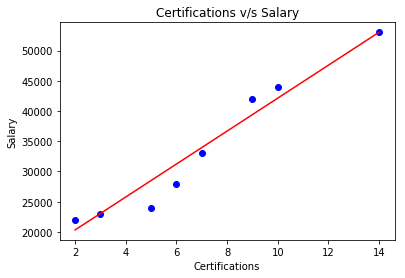

In [266]:
plt.scatter(certifications,salary,color='Blue')
plt.plot(certifications,model.predict(certifications.reshape(-1,1)), color = 'red')
plt.title('Certifications v/s Salary')
plt.xlabel('Certifications')
plt.ylabel('Salary')

In [267]:
# Second approach: Fill missing values with mean of that column. And then all the steps as above.

data_mean = data.fillna(data.mean())

print(data_mean) # You can see that cells containing NaN are replaced with mean values now

        Age  Certifications   Salary
0  1.000000        2.000000  22000.0
1  2.000000        3.000000  23000.0
2  3.000000        5.000000  24000.0
3  5.000000        6.000000  28000.0
4  6.000000        7.000000  33000.0
5  4.722222        8.000000  39000.0
6  7.000000        9.000000  42000.0
7  7.500000       10.000000  44000.0
8  6.000000        7.111111  52000.0
9  5.000000       14.000000  53000.0


Example: The following command can be used to replaced missing values in Gender column with 'unknown' value: 
dataset['Gender'].fillna('unknown',inplace=True)

In [268]:
certifications=data_mean.iloc[:,-2].values

salary=data_mean.iloc[:,-1].values

certification_train,certification_test,salary_train,salary_test=train_test_split(certifications,salary,test_size=0.2)

salary_prediction=model.predict(certification_test.reshape(-1,1))

RMSE=np.sqrt(metrics.mean_squared_error(salary_test,salary_prediction))

print("RMSE:", RMSE)

print("R2:",r2_score(salary_test,salary_prediction))

RMSE: 3183.9416030783746
R2: 0.9517836664360843


In [269]:
# let's plot the original data, and the two predicted salaries

Text(0, 0.5, 'Salary')

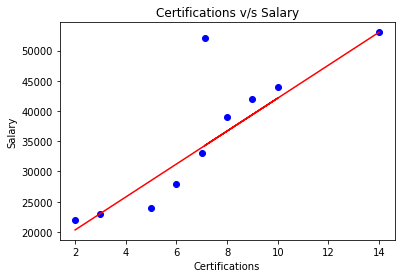

In [270]:
plt.scatter(certifications,salary,color='Blue')
plt.plot(certifications,model.predict(certifications.reshape(-1,1)), color = 'red')
plt.title('Certifications v/s Salary')
plt.xlabel('Certifications')
plt.ylabel('Salary')

# Generalized steps for Linear Regression

data load

extract independent variable x
extract dependent variable y

model=linearregression()

x_train, x_test, y_train, y_test = train_test_split (x, y, test_size, random_state)

model.fit(x_train, y_train)
intercept_
coef_

y_prediction = model.predict (x_test)

RMSE (y_test, y_prediction)

r2_score (y_test, y_prediction)

model.predict (x_new)